In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.integrate
import scipy.optimize
from pandas import *
# from jupyterthemes import jtplot
import numba as nb
import matplotlib.pyplot as plt

from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from scipy import signal
#%matplotlib notebook
plt.rcParams["font.size"]="24"
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.width'] = 2
# plt.rcParams['figure.figsize'] = [10, 10]

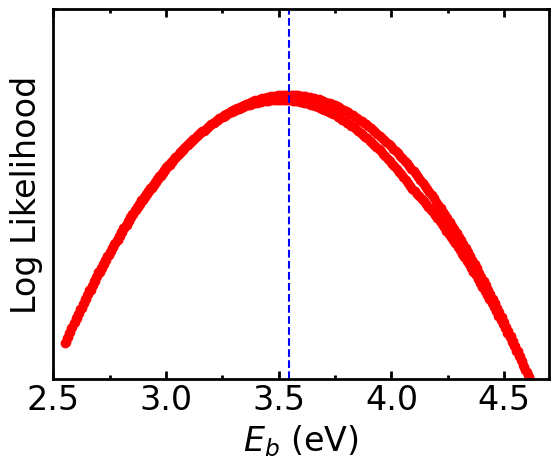

In [6]:
N= 500
L = np.loadtxt('Posterior_log_likelihood_compute_data.txt')
Eb = np.loadtxt('Posterior_Eb_data.txt')
nu = np.loadtxt('Posterior_nu_data.txt')
nk=N #80 #N

fig, ax = plt.subplots()
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))
ax.plot(Eb[10:nk],np.max(L,axis=0)[10:nk],'ro')
ax.plot(Eb[10+np.argmax(np.max(L,axis=0)[10:nk])]*np.ones(30), np.linspace(921,922,30), 'b--')
# ax.plot(3.48*np.ones(30), np.linspace(921,922,30), 'b--')
# ax.tick_params(direction = 'in', length = 6, top = True, right = True, which = 'Major')
plt.ylim(921,922)
plt.xlim(2.5, 4.7)
plt.ylabel('Log Likelihood')
plt.xlabel('$E_b$ (eV)')
plt.tick_params(direction = 'in', length = 6, top = True, right = True, which = 'major')
plt.tick_params(direction = 'in', length = 3, top = True, right = True, which = 'minor')
# plt.legend(bbox_to_anchor=(0.5, -.65), loc='lower center',frameon=False, prop={'size':'14'})
plt.savefig('likelihood_function_Eb.png', bbox_inches='tight')

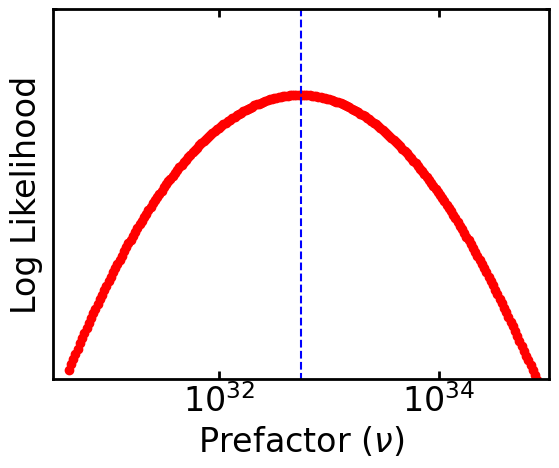

In [7]:
nk=0 #10
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_major_locator(MultipleLocator(20))
ax.yaxis.set_minor_locator(AutoMinorLocator(20))
ax.semilogx(nu[nk:],np.max(L,axis=1)[nk:],'ro')
ax.semilogx(10**np.log10(nu[nk+np.argmax(np.max(L,axis=1)[nk:])])*np.ones(30), np.linspace(915,922,30), 'b--')
# ax.semilogx(10**32.15435022276074*np.ones(30), np.linspace(915,922,30), 'b--')
# ax.tick_params(direction = 'in', length = 6, top = True, right = True, which = 'Major')
plt.ylim(921,922)
plt.xlim(10**30.5,1e35)
plt.ylabel('Log Likelihood')
plt.xlabel('Prefactor ('+r'$\nu$)')
plt.tick_params(direction = 'in', length = 6, top = True, right = True, which = 'major')
plt.tick_params(direction = 'in', length = 3, top = True, right = True, which = 'minor')
plt.savefig('likelihood_function_nu.png', bbox_inches='tight')


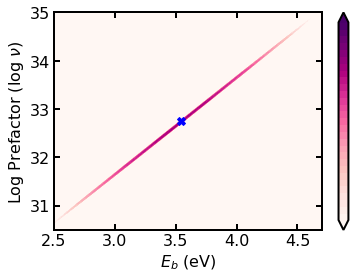

In [12]:
x = Eb[10+np.argmax(np.max(L,axis=0)[10:])]
y = np.log10(nu[nk+np.argmax(np.max(L,axis=1)[nk:])])

L[L == -np.inf] = 0
np.savetxt('Posterior_log_likelihood_compute_data.txt', L, delimiter=' ')
np.savetxt('Posterior_Eb_data.txt', Eb, delimiter=' ')
np.savetxt('Posterior_nu_data.txt', nu, delimiter=' ')
cs = plt.contourf(Eb, np.log10(nu), L, cmap = 'RdPu',levels=np.linspace(921., 922,30) , extend='both')#levels = np.linspace(np.min(L), np.max(L),50)
plt.plot(Eb[10+np.argmax(np.max(L,axis=0)[10:])],np.log10(nu[nk+np.argmax(np.max(L,axis=1)[nk:])]), 'bX', markersize=8) # from NEB and Entropy est.
# plt.annotate('' + '{:.2f}'.format(x) +'eV, '+ '{:.2E}'.format(10**y)+' /s', (x-.4,y-1), color='b')
plt.colorbar(cs).set_ticks([])

plt.rcParams['font.size'] = "16"
plt.ylabel('Log Prefactor ('+r'log $\nu$)')
plt.xlabel('$E_b$ (eV)')
plt.ylim(30.5,35)
plt.xlim(2.5,4.7)
plt.tick_params(direction = 'in', length = 6, top = True, right = True, which = 'major')
plt.tick_params(direction = 'in', length = 3, top = True, right = True, which = 'minor')
plt.savefig('likelihood_paramter_contour.png', bbox_inches='tight', dpi=600)

In [20]:
y

32.745490981963925